## Assignment 2

(500, 2)
(500,)


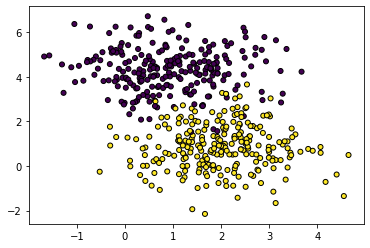

In [5]:
from sklearn import linear_model
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

##1 Prepare data
#1.1 Get X and y in the right shape
X, y = make_blobs(n_samples=500, centers=2, n_features=2,
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

print(X.shape)    #should be (m,n)
print(y.shape)    #should be (m, )

1.Put everything into a class called LogisticRegression. The training method should be "minibatch".

2.Perform a classification on the data given above.

3.Plot training losses as number of iters increases.

4.Write a class called classification_report containing 4 functions (Accuracy, Recall, Precision, F1) and use it to evaluate your model.

In [12]:
#1.2 Feature scaling helps reaching convergence faster
scaler = StandardScaler()
X = scaler.fit_transform(X)

#1.3 Train test split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#1.4 Add intercepts
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  # add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  # add intercept


##2 Define algorithm
class LogisticRegression:
    def __init__(self, alpha=0.0001, max_iter=10000, old_loss=10000):
        self.alpha = alpha
        self.max_iter = max_iter
        self.old_loss = old_loss
        
    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        #l_rate = 0.01
        self.losses = []
        
        #the training method should be "mini-batch"
        #random 10% of samples
        batch_size = int(0.1 * X.shape[0])
        for i in range(self.max_iter):
            ix = np.random.randint(0, X.shape[0])     #<----with replacement
            batch_X = X[ix:ix+batch_size]
            batch_y = y[ix:ix+batch_size]
            loss, grad = self.gradient(batch_X, batch_y)
            if i % 500 == 0:
                print(f"Loss at iteration {i}", loss)
                self.losses.append(loss)
            self.theta = self.theta - self.alpha * grad  #update the theta
            
            
        
    def gradient(self, X, y):
        m = X.shape[0]
        h = self.h_theta(X)
        error = h - y
        # putting negative sign for negative log likelihood
        loss = - np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        grad = np.dot(X.T, error)
        return loss, grad
        
    def sigmoid(self, X):
        return (1+np.exp(-X))**(-1)
               
    def h_theta(self, X):
        return self.sigmoid(X@self.theta)
             
    def output(self, X_test):     #the output(predict) from the data of X_test
        yhat = np.round(self.sigmoid(X_test@self.theta))
        return yhat
        
    def plot(self):
        plt.plot(np.arange(len(self.losses)), self.losses)  
        plt.title("Losses")
        plt.xlabel("X")
        plt.ylabel("y")
        
        
    

In [22]:
print(np.arange(len(X.losses)))

AttributeError: 'numpy.ndarray' object has no attribute 'losses'

Loss at iteration 0 24.26015131959808
Loss at iteration 500 3.3705796289178185
Loss at iteration 1000 12.624515391983104
Loss at iteration 1500 7.741749233884703
Loss at iteration 2000 8.914109095782546
Loss at iteration 2500 8.95610706688643
Loss at iteration 3000 5.581081405407009
Loss at iteration 3500 5.47591976231908
Loss at iteration 4000 2.929572349241589
Loss at iteration 4500 4.66972802794777
Loss at iteration 5000 5.461331406555446
Loss at iteration 5500 5.3680120610834905
Loss at iteration 6000 6.721687741769267
Loss at iteration 6500 4.29175942794201
Loss at iteration 7000 6.2169756963270535
Loss at iteration 7500 3.6035127184850535
Loss at iteration 8000 5.5373832322847125
Loss at iteration 8500 5.234673086701946
Loss at iteration 9000 5.310553089195686
Loss at iteration 9500 2.354382673057755


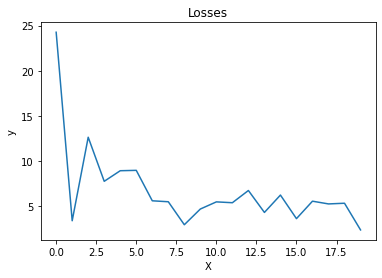

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)
yhat = model.output(X_test)
model.plot()

In [14]:
class classification_reports():
    
    def __init__(self, actual, predict):
        self.actual = actual
        self.predict = predict
        
        
        self.TP = sum((self.actual == 1) & (self.predict == 1))
        self.TN = sum((self.actual == 0) & (self.predict == 0))
        self.FN = sum((self.actual == 1) & (self.predict == 0))
        self.FP = sum((self.actual == 0) & (self.predict == 1))
        
    def accuracy(self):
        self.accuracy = 100 * (self.TP + self.TN)/ (self.TP + self.TN + self.FN + self.FP)
        return self.accuracy
    
    def recall(self):
        self.recall = (100 * self.TP)/ (self.TP + self.FN)
        return self.recall
        
    def precision(self):
        self.precision = 100 * (self.TP)/ (self.TP + self.FP)
        return self.precision
        
    def f1(self):
        self.f1 = 2 * (self.precision * self.recall) / (self.precision + self.recall)
        return self.f1


In [18]:
#From scratch
report = classification_reports(y_test, yhat)
print("################From scratch#################")
print("Accuracy: ", report.accuracy())
print("Recall: ", report.recall())
print("Precision: ", report.precision())
print("F1: ", report.f1())

################From scratch#################
Accuracy:  96.66666666666667
Recall:  95.5223880597015
Precision:  96.96969696969697
F1:  96.24060150375938


In [20]:
#From sklearn
from sklearn.metrics import classification_report
print("Report: ", classification_report(y_test, yhat))

Report:                precision    recall  f1-score   support

           0       0.96      0.98      0.97        83
           1       0.97      0.96      0.96        67

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

